# Data Loading

Images are in CZI format so they are probably from a Zeiss microscope.
Let's first look into loading these images and viewing them.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from czifile import CziFile
from napari import Viewer

In [2]:
DATA_DIR = Path("../data/NS_3_Healthy_untreated_D19.czi")

In [3]:
image_handle = CziFile(DATA_DIR)
img = np.squeeze(image_handle.asarray())

Get the scale in microns.

In [4]:
scale = {
    values_dict["Id"]: values_dict["Value"] * 10**6
    for values_dict in image_handle.metadata(raw=False)["ImageDocument"]["Metadata"][
        "Scaling"
    ]["Items"]["Distance"]
}
scale

{'X': 0.18130982905982898, 'Y': 0.18130982905982898, 'Z': 0.75}

(-0.5, 800.5, 577.5, -0.5)

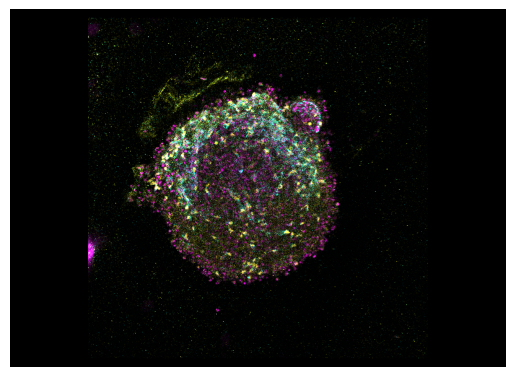

In [5]:
viewer = Viewer()
viewer.add_image(img, channel_axis=0, name=["G38P", "ISL1", "DAPI"])
plt.imshow(viewer.screenshot())
plt.axis("off")

Images are saturated where the structures of interest are.
Images are 8-bit which is good to save space and is probably enough for segmentation.